In [1]:
import datetime
import netCDF4
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# the URL for West Terschelling
url = 'http://opendap.deltares.nl/thredds/dodsC/opendap/rijkswaterstaat/waterbase/27_Waterhoogte_in_cm_t.o.v._normaal_amsterdams_peil_in_oppervlaktewater/nc/id1-WESTTSLG.nc'

In [3]:
# open the dataset
ds = netCDF4.Dataset(url)

In [4]:
# lookup relevant variables
t = ds.variables['time']
ssh = ds.variables['sea_surface_height']
                 


In [5]:
# convert to table
# get all times and convert to date objects (so we can group by year)
dates = netCDF4.num2date(t[:], ds.variables['time'].units)
# query history of sea surface height and squeeze out empty dimension (1 location x time)
ssh_values = np.squeeze(ssh[:])
df = pd.DataFrame(data=dict(dates=dates, ssh=ssh_values))
# use date as an index
df = df.set_index('dates')

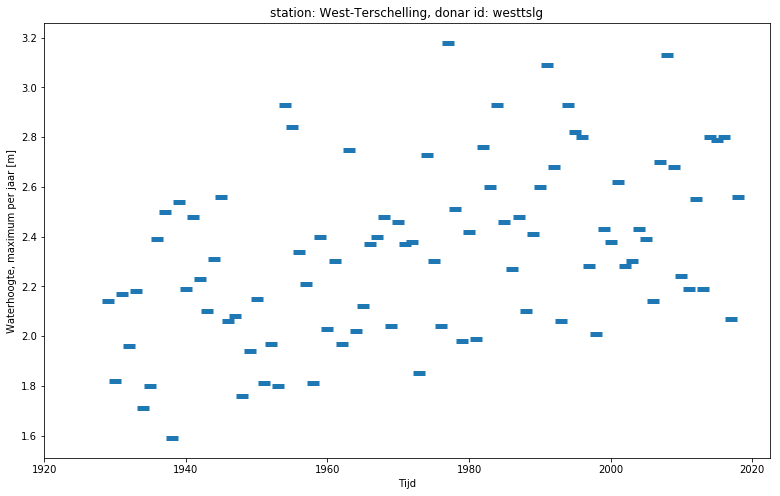

In [10]:
# make a new figure
fig, ax = plt.subplots(figsize=(13, 8))
# group data per year (max over 2000 is stored as 2000-12-31)
grouped = df.groupby(pd.Grouper(freq="A", label='right'))
grouped_max = grouped.max()
grouped_min = grouped.min()
ax.plot(
    grouped_max.index.to_pydatetime(), 
    grouped_max.ssh, 
    marker='_', 
    linewidth=0, 
    markeredgewidth=5, 
    markersize=12
)

y_label = "{name}, maximum per jaar [{units}]".format(
    name=ds.variables['sea_surface_height'].Aquo_Grootheid_omschrijving,
    units=ds.variables['sea_surface_height'].Aquo_Eenheid_code
)
ax.set_ylabel(y_label)
ax.set_xlabel('Tijd')
title = "station: {station}, donar id: {donar_id}".format(station=ds.stationname, donar_id=ds.donar_code)
ax.set_title(title)
ticks = list(
    datetime.datetime(1920 + i, 1, 1).toordinal() 
    for i 
    in range(0, 110, 20)
)
ax.xaxis.set_ticks(ticks);
